# CS F320 Assignment
#1-B




# Data Points

In [3]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits import mplot3d
from google.colab import drive
#importing csv file 
drive.mount('/content/drive')
path = "/content/drive/MyDrive/fods_assign/fods_1.csv"
df = pd.read_csv(path)
#df.describe

Mounted at /content/drive


In [4]:
X = np.array(df.drop(["quantitative response of LC50"],1))
y = np.array(df["quantitative response of LC50"])
p = 0.8                                  # 80-20 split for training-testing
p*X.shape[0]
n_train = math.floor(p * X.shape[0])     #train data
n_test = math.ceil((1-p) * X.shape[0])   #test data
X_train = X[:n_train]                    # MLOGP and RDCHI
y_train = y[:n_train]                    # LC50
X_test = X[n_train:]
y_test = y[n_train:] 
#print(X_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


3D PLOT

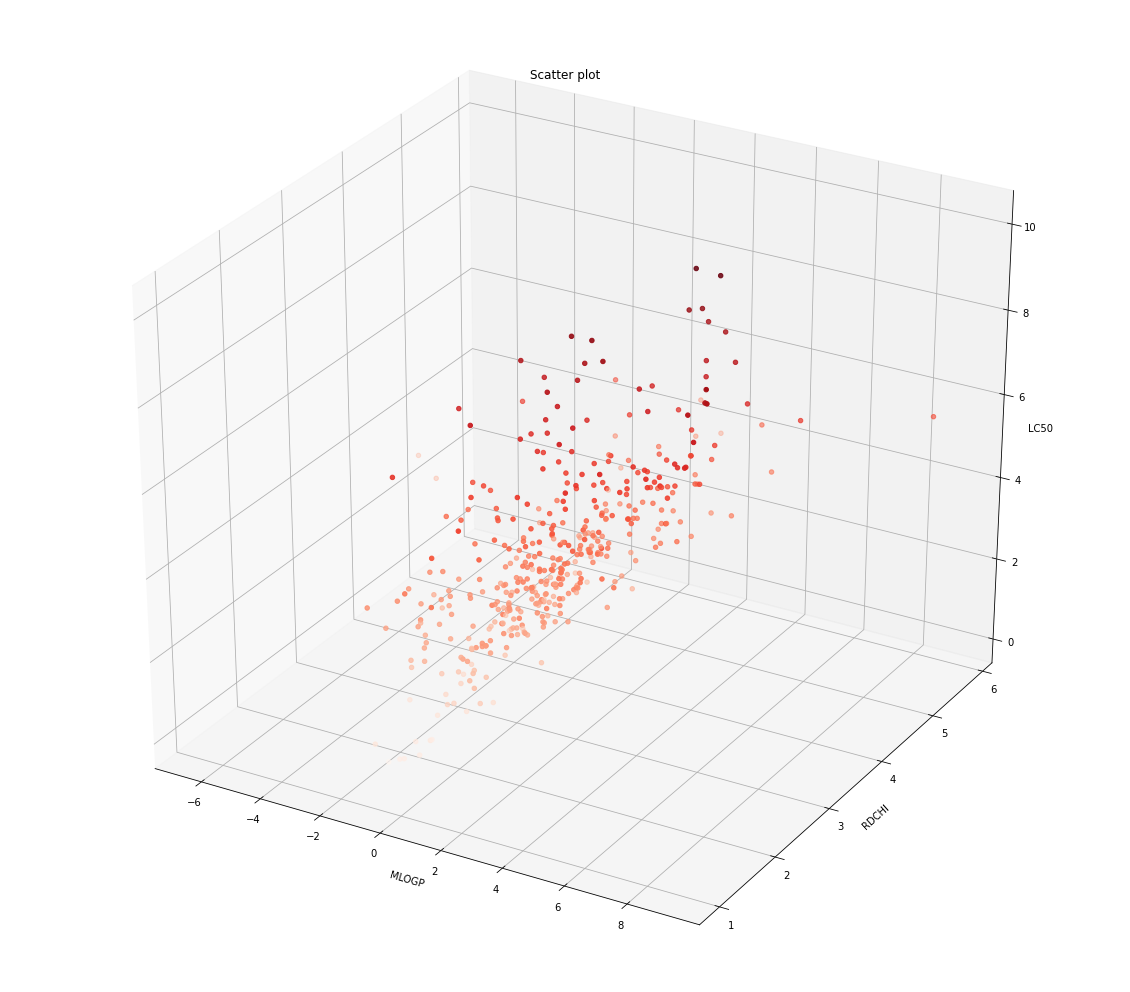

In [5]:
x = X_train[:,0]   #MLOGP
y = X_train[:,1]   #RDCHI
z = y_train        #LC50
 
# Creating 3D figure
fig = plt.figure(figsize =(20, 18))
ax = plt.axes(projection ='3d')
ax.set_xlabel('MLOGP')
ax.set_ylabel('RDCHI')
ax.set_zlabel('LC50')
ax.set_title('Scatter plot')
ax.scatter3D(x, y, z, c=z, cmap='Reds');
plt.show()      # show plot

# Polynomial Regression

Polynomial of Degree 1

In [6]:
w0 = np.random.randn()
w1 = np.random.randn()
w2 = np.random.randn()          #assigning random weights initially

#Loss function for w0 + w1*x1 + w2*x2 (degree 1)
def calc_loss_linear(X):
  cnt = 0
  avg_loss = 0
  for i in X:
    pred = w0 + w1 * i[0] + w2 * i[1]
    loss_iter = (pred - y_train[cnt])**2 #mse loss
    avg_loss+=loss_iter
    cnt+=1
  avg_loss = avg_loss / X.shape[0]
  return avg_loss

print(calc_loss_linear(X_train))
print(calc_loss_linear(X_test))

3.115467721260481
7.499872740525024


In [7]:
def grad_desc_linear(X):
  cnt = 0
  global w1
  global w2
  global w0
  w1_grad = 0
  w2_grad = 0
  w0_grad = 0
  for i in X:
    pred = w0 + w1 * i[0] + w2 * i[1]
    w1_grad += (2/X.shape[0])*(pred - y_train[cnt])*(i[0])
    w2_grad += (2/X.shape[0])*(pred - y_train[cnt])*(i[1])
    w0_grad += (2/X.shape[0])*(pred - y_train[cnt])
    cnt+=1
  w1 = w1 - 0.001 * w1_grad
  w2 = w2 - 0.001 * w2_grad
  w0 = w0 - 0.001 * w0_grad

def stoch_grad_desc_linear(X):
  cnt = 0
  global w1
  global w2
  global b
  w1_grad = 0
  w2_grad = 0
  b_grad = 0
  for i in X:
    pred = w1 * i[0] + w2 * i[1] + b
    w1_grad += (2/X.shape[0])*(pred - y_train[cnt])*(i[0])
    w2_grad += (2/X.shape[0])*(pred - y_train[cnt])*(i[1])
    b_grad += (2/X.shape[0])*(pred - y_train[cnt])
    cnt+=1
  w1 = w1 - 0.001 * w1_grad
  w2 = w2 - 0.001 * w2_grad
  b = b - 0.001 * b_grad

loss=  4.416478177913471
w1 =  0.4476994420112287
w2 =  0.580724353491243
w0 =  2.132767478351879


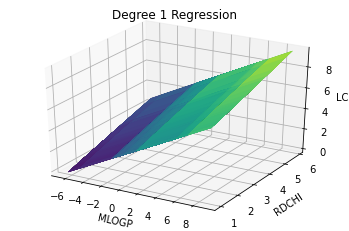

In [8]:
for i in range(0,10000):
  #print(calc_loss_linear(X_train))
  grad_desc_linear(X_train)

print('loss= ',calc_loss_linear(X_test))
print('w1 = ',w1)
print('w2 = ',w2)
print('w0 = ',w0)

def fun(x, y):
    return w1*x+w2*y+w0

x = X_train[:,0]
y = X_train[:,1]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)
zs = np.array(fun(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)

 
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

ax.set_xlabel('MLOGP')
ax.set_ylabel('RDCHI')
ax.set_zlabel('LC50')
ax.set_title('Degree 1 Regression')

plt.show()

Polynomial of Degree 2

In [9]:
w1 = np.random.randn()
w2 = np.random.randn()
w3 = np.random.randn()
b = np.random.randn()

def calc_loss_quad(X):
  cnt = 0
  avg_loss = 0
  for i in X:
    pred = w1 * (i[0])**2 + w2*i[0]*i[1] + w3 * (i[1])**2 + w0
    loss_iter = (pred - y_train[cnt])**2 #mse loss
    avg_loss+=loss_iter
    cnt+=1
  avg_loss = avg_loss / X.shape[0]
  return avg_loss
print(calc_loss_quad(X_train))
print(calc_loss_quad(X_test))

133.77056869080235
122.6793818840916


loss =  5.791276479871525
w1 =  0.03584440016062405
w2 =  0.09445214106693771
w3 =  0.036156366288938264
w0 =  3.4666618545074153


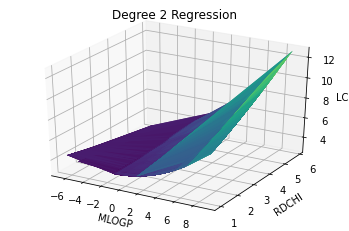

In [10]:
def grad_desc_quad(X):
  cnt = 0
  global w1
  global w2
  global w3
  global b
  w1_grad = 0
  w2_grad = 0
  w3_grad = 0
  b_grad = 0
  for i in X:
    pred = w1 * (i[0])**2 + w2*i[0]*i[1] + w3 * (i[1])**2 + b
    w1_grad += (2/X.shape[0])*(pred - y_train[cnt])*((i[0])**2)
    w2_grad += (2/X.shape[0])*(pred - y_train[cnt])*(i[0]*i[1])
    w3_grad += (2/X.shape[0])*(pred - y_train[cnt])*(i[1]**2)
    b_grad += (2/X.shape[0])*(pred - y_train[cnt])
    cnt+=1
  w1 = w1 - 0.001 * w1_grad
  w2 = w2 - 0.001 * w2_grad
  w3 = w3 - 0.001 * w3_grad
  b = b - 0.001 * b_grad

for i in range(0,5000):
  #print(calc_loss_quad(X_train))
  grad_desc_quad(X_train)

print('loss = ',calc_loss_quad(X_test))
print('w1 = ',w1)
print('w2 = ',w2)
print('w3 = ',w3)
print('w0 = ',b)

def fun(x, y):
    return w1*(x**2)+w2*x*y+ w3*(y**2)+b

x = X_train[:,0]
y = X_train[:,1]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)
zs = np.array(fun(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

ax.set_xlabel('MLOGP')
ax.set_ylabel('RDCHI')
ax.set_zlabel('LC50')
ax.set_title('Degree 2 Regression')

plt.show()

Polynomial of Degree 3

In [11]:
w1 = np.random.randn()
w2 = np.random.randn()
w3 = np.random.randn()
w4 = np.random.randn()
b = np.random.randn()

def calc_loss_three(X):
  cnt = 0
  avg_loss = 0
  for i in X:
    pred = w1 * (i[0])**3 + w2*(i[0]**2)*i[1] + w3*i[0]*(i[1]**2) + w4 * (i[1])**3 + b
    loss_iter = (pred - y_train[cnt])**2 #mse loss
    avg_loss+=loss_iter
    cnt+=1
  avg_loss = avg_loss / X.shape[0]
  return avg_loss

print(calc_loss_three(X_train))
print(calc_loss_three(X_test))

3849.5697591984745
3287.4434065583523


In [12]:
def grad_desc_three(X):
  cnt = 0
  global w1
  global w2
  global w3
  global w4
  global b
  w1_grad = 0
  w2_grad = 0
  w3_grad = 0
  w4_grad = 0
  b_grad = 0
  for i in X:
    pred = w1 * (i[0])**3 + w2*(i[0]**2)*i[1] + w3*i[0]*(i[1]**2) + w4 * (i[1])**3 + b
    w1_grad += (2/X.shape[0])*(pred - y_train[cnt])*((i[0])**3)
    w2_grad += (2/X.shape[0])*(pred - y_train[cnt])*(pow(i[0],2)*i[1])
    w3_grad += (2/X.shape[0])*(pred - y_train[cnt])*(i[0] * pow(i[1],2))
    w4_grad += (2/X.shape[0])*(pred - y_train[cnt])*(i[1]**3)
    b_grad += (2/X.shape[0])*(pred - y_train[cnt])
    cnt+=1
  w1 = w1 - 0.0001 * w1_grad ##higher lr causes overshoot
  w2 = w2 - 0.0001 * w2_grad
  w3 = w3 - 0.0001 * w3_grad
  w4 = w4 - 0.0001 * w4_grad
  b = b - 0.0001 * b_grad

for i in range(0,5000):
  #print(calc_loss_three(X_train))
  grad_desc_three(X_train)


loss =  9.834878922524457
w1 =  -0.001696772352465717
w2 =  0.017721385308587734
w3 =  0.04140767964872743
w4 =  0.04217705075399743
w0 =  0.8882155535426758


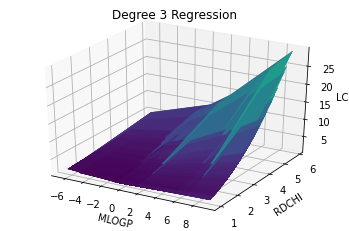

In [13]:
print('loss = ', calc_loss_three(X_test))
print('w1 = ', w1)
print('w2 = ', w2)
print('w3 = ', w3)
print('w4 = ', w4)
print('w0 = ', b)


def fun(x, y):
    return w1*(x**3) + w2*(x**2)*y + w3*x*(y**2) + w4*(y**3)+b

x = X_train[:,0]
y = X_train[:,1]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)
zs = np.array(fun(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

ax.set_xlabel('MLOGP')
ax.set_ylabel('RDCHI')
ax.set_zlabel('LC50')
ax.set_title('Degree 3 Regression')

plt.show()

Polynomial of Degree 4

In [14]:
w1 = np.random.randn()
w2 = np.random.randn()
w3 = np.random.randn()
w4 = np.random.randn()
w5 = np.random.randn()
b = np.random.randn()

def calc_loss_four(X):
  cnt = 0
  avg_loss = 0
  for i in X:
    pred = w1 * (i[0])**4 + w2*(i[0]**3)*i[1] + w2*(i[0]**2)*(i[1]**2) + w4*i[0]*(i[1]**3) + w5 * (i[1])**4 + b
    loss_iter = (pred - y_train[cnt])**2 #mse loss
    avg_loss+=loss_iter
    cnt+=1
  avg_loss = avg_loss / X.shape[0]
  return avg_loss

print(calc_loss_four(X_train))
print(calc_loss_four(X_test))

38147.12275806611
13826.61484118016


In [15]:
def grad_desc_four(X):
  cnt = 0
  global w1
  global w2
  global w3
  global w4
  global w5
  global b
  w1_grad = 0
  w2_grad = 0
  w3_grad = 0
  w4_grad = 0
  w5_grad = 0
  b_grad = 0
  for i in X:
    pred = w1 * (i[0])**4 + w2*(i[0]**3)*i[1] + w2*(i[0]**2)*(i[1]**2) + w4*i[0]*(i[1]**3) + w5 * (i[1])**3 + b
    w1_grad += (2/X.shape[0])*(pred - y_train[cnt])*((i[0])**4)
    w2_grad += (2/X.shape[0])*(pred - y_train[cnt])*((i[0]**3)*i[1])
    w3_grad += (2/X.shape[0])*(pred - y_train[cnt])*((i[0]**2)*(i[1]**2))
    w4_grad += (2/X.shape[0])*(pred - y_train[cnt])*(i[0]*(i[1]**3))
    w5_grad += (2/X.shape[0])*(pred - y_train[cnt])*(i[1]**4)
    b_grad += (2/X.shape[0])*(pred - y_train[cnt])
    cnt+=1
  w1 = w1 - 1e-6 * w1_grad ##higher lr causes overshoot
  w2 = w2 - 1e-6 * w2_grad
  w3 = w3 - 1e-6 * w3_grad
  w4 = w4 - 1e-6 * w4_grad
  w5 = w5 - 1e-6 * w5_grad
  b = b - 1e-6 * b_grad

loss =  1980.1806196273094
w1 =  -0.076586285137756
w2 =  0.1323615985324682
w3 =  -0.458754662573445
w4 =  -0.23391637369671284
w5 =  0.2499374587940671
w0 =  -0.6782676077419763


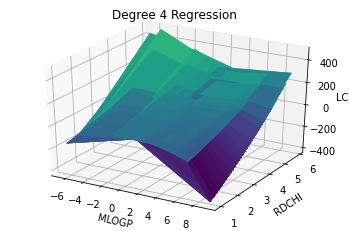

In [16]:
for i in range(0,5000):
  #print(calc_loss_four(X_train))
  grad_desc_four(X_train)

print('loss = ', calc_loss_four(X_test))
print('w1 = ', w1)
print('w2 = ', w2)
print('w3 = ', w3)
print('w4 = ', w4)
print('w5 = ', w5)

print('w0 = ', b)
def fun(x, y):
    return w1 * (x)**4 + w2*(x**3)*y + w2*(x**2)*(y**2) + w4*x*(y**3) + w5 * (y)**4 + b

x = X_train[:,0]
y = X_train[:,1]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)
zs = np.array(fun(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

ax.set_xlabel('MLOGP')
ax.set_ylabel('RDCHI')
ax.set_zlabel('LC50')
ax.set_title('Degree 4 Regression')

plt.show()

Polynomial of Degree 5

In [17]:
w1 = np.random.randn()
w2 = np.random.randn()
w3 = np.random.randn()
w4 = np.random.randn()
w5 = np.random.randn()
w6 = np.random.randn()
b = np.random.randn()

def calc_loss_five(X):
  cnt = 0
  avg_loss = 0
  for i in X:
    pred = w1 * i[0]**5 + w2*(i[0]**4)*i[1] + w3*(i[0]**3)*(i[1]**2) + w4*(i[0]**2)*(i[1]**3) + w5*i[0]*(i[1]**4) + w6*i[1]**5 + b
    loss_iter = (pred - y_train[cnt])**2 #mse loss
    avg_loss+=loss_iter
    cnt+=1
  avg_loss = avg_loss / X.shape[0]
  return avg_loss

print(calc_loss_five(X_train))
print(calc_loss_five(X_test))

17753043.59479702
3853380.308685222


In [18]:
def grad_desc_five(X):
  cnt = 0
  global w1, w2, w3, w4, w5, w6
  global b
  w1_grad = 0
  w2_grad = 0
  w3_grad = 0
  w4_grad = 0
  w5_grad = 0
  w6_grad = 0
  b_grad = 0

  for i in X:
    pred = w1 * (i[0])**5 + w2*(i[0]**4)*i[1] + w3*(i[0]**3)*(i[1]**2) + w4*(i[0]**2)*(i[1]**3) + w5*i[0]*(i[1]**4) + w6*i[1]**5 + b
    w1_grad += (2/X.shape[0])*(pred - y_train[cnt])*(i[0])**5
    w2_grad += (2/X.shape[0])*(pred - y_train[cnt])*(i[0]**4)*i[1]
    w3_grad += (2/X.shape[0])*(pred - y_train[cnt])*(i[0]**3)*(i[1]**2)
    w4_grad += (2/X.shape[0])*(pred - y_train[cnt])*(i[0]**2)*(i[1]**3)
    w5_grad += (2/X.shape[0])*(pred - y_train[cnt])*(i[1]**4)*i[0]
    w6_grad += (2/X.shape[0])*(pred - y_train[cnt])*i[1]**5
    b_grad += (2/X.shape[0])*(pred - y_train[cnt])
    cnt+=1
  w1 = w1 - 1e-8 * w1_grad ##higher lr causes overshoot
  w2 = w2 - 1e-8 * w2_grad
  w3 = w3 - 1e-8 * w3_grad
  w4 = w4 - 1e-8 * w4_grad
  w5 = w5 - 1e-8 * w5_grad
  w6 = w6 - 1e-8 * w6_grad
  b = b - 1e-8 * b_grad

loss =  33901.43912712268
w0 =  0.2749154116413848
w1 =  0.14382756005475905
w2 =  -0.5468769969977796
w3 =  0.23072375520891536
w4 =  0.9590196841034632
w5 =  -0.8955313508294107
w6 =  0.1267295510092457


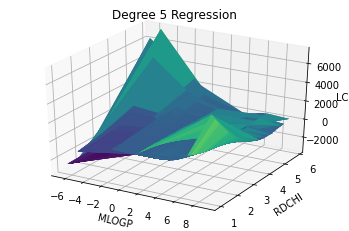

In [19]:
for i in range(0,5000):
  #print(calc_loss_five(X_train))
  grad_desc_five(X_train)

print('loss = ', calc_loss_five(X_test))
print('w0 = ', b)
print('w1 = ', w1)
print('w2 = ', w2)
print('w3 = ', w3)
print('w4 = ', w4)
print('w5 = ', w5)
print('w6 = ', w6)
def fun(x, y):
    return w1*(x)**5 + w2*y*x**4 + w3*(x**3)*y**2 + w4*(x**2)*(y**3) + w5*x*(y**4) + w6*(y)**5 + b

x = X_train[:,0]
y = X_train[:,1]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)
zs = np.array(fun(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

ax.set_xlabel('MLOGP')
ax.set_ylabel('RDCHI')
ax.set_zlabel('LC50')
ax.set_title('Degree 5 Regression')

plt.show()

Polynomial of Degree 6

In [20]:
w1 = np.random.randn()
w2 = np.random.randn()
w3 = np.random.randn()
w4 = np.random.randn()
w5 = np.random.randn()
w6 = np.random.randn()
w7 = np.random.randn()
b = np.random.randn()

def calc_loss_six(X):
  cnt = 0
  avg_loss = 0
  for i in X:
    pred = w1*(i[0])**6 + w2*(i[0]**5)*i[1] + w3*(i[0]**4)*(i[1]**2) + w4*(i[0]**3)*(i[1]**3) + w5*(i[0]**2)*(i[1]**4) + w6*(i[1]**5)*i[0] + w7*i[1]**6 + b
    loss_iter = (pred - y_train[cnt])**2 #mse loss
    avg_loss+=loss_iter
    cnt+=1
  avg_loss = avg_loss / X.shape[0]
  return avg_loss

print(calc_loss_five(X_train))
print(calc_loss_five(X_test))
print(b)

23905028.339133732
4666633.860972514
-2.185899026629285


In [21]:
def grad_desc_six(X):
  cnt = 0
  global w1, w2, w3, w4, w5, w6, w7, b
  w1_grad = 0
  w2_grad = 0
  w3_grad = 0
  w4_grad = 0
  w5_grad = 0
  w6_grad = 0
  w7_grad = 0
  b_grad = 0

  for i in X:
    pred = w1*(i[0])**6 + w2*(i[0]**5)*i[1] + w3*(i[0]**4)*(i[1]**2) + w4*(i[0]**3)*(i[1]**3) + w5*(i[0]**2)*(i[1]**4) + w6*i[0]*(i[1]**5) + w7*(i[1]**6) + b
    w1_grad += (2/X.shape[0])*(pred - y_train[cnt])*(i[0])**6
    w2_grad += (2/X.shape[0])*(pred - y_train[cnt])*(i[0]**5)*i[1]
    w3_grad += (2/X.shape[0])*(pred - y_train[cnt])*(i[0]**4)*(i[1]**2)
    w4_grad += (2/X.shape[0])*(pred - y_train[cnt])*(i[0]**3)*(i[1]**3)
    w5_grad += (2/X.shape[0])*(pred - y_train[cnt])*(i[0]**2)*(i[1]**4)
    w6_grad += (2/X.shape[0])*(pred - y_train[cnt])*(i[1]**5)*i[0]
    w7_grad += (2/X.shape[0])*(pred - y_train[cnt])*i[1]**6
    b_grad += (2/X.shape[0])*(pred - y_train[cnt])
    cnt+=1
  w1 = w1 - 1e-8 * w1_grad ##higher lr causes overshoot
  w2 = w2 - 1e-8 * w2_grad
  w3 = w3 - 1e-8 * w3_grad
  w4 = w4 - 1e-8 * w4_grad
  w5 = w5 - 1e-8 * w5_grad
  w6 = w6 - 1e-8 * w6_grad
  w7 = w7 - 1e-8 * w7_grad
  b = b - 1e-8 * b_grad

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in double_scalars
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


loss =  nan
w0 =  nan
w1 =  nan
w2 =  nan
w3 =  nan
w4 =  nan
w5 =  nan
w6 =  nan
w7 =  nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: Z contains NaN values. This may result in rendering artifacts.


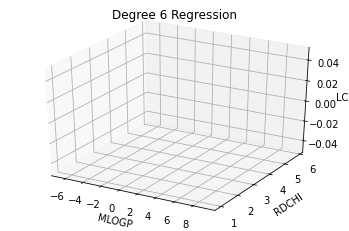

In [22]:
for i in range(0,5000):
  #print(calc_loss_six(X_train))
  grad_desc_six(X_train)

print('loss = ', calc_loss_six(X_test))
print('w0 = ', b)
print('w1 = ', w1)
print('w2 = ', w2)
print('w3 = ', w3)
print('w4 = ', w4)
print('w5 = ', w5)
print('w6 = ', w6)
print('w7 = ', w7)

def fun(x, y):
    return w1*(x**6) + w2*y*(x**5) + w3*(x**4)*(y**2) + w4*(x**3)*(y**3) + w5*(x**2)*(y**4) + w6*x*(y)**5 + w7*(y**6) + b

x = X_train[:,0]
y = X_train[:,1]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)
zs = np.array(fun(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

ax.set_xlabel('MLOGP')
ax.set_ylabel('RDCHI')
ax.set_zlabel('LC50')
ax.set_title('Degree 6 Regression')

plt.show()

Polynomial of Degree 7

In [23]:
w1 = np.random.randn()
w2 = np.random.randn()
w3 = np.random.randn()
w4 = np.random.randn()
w5 = np.random.randn()
w6 = np.random.randn()
w7 = np.random.randn()
w8 = np.random.randn()
b = np.random.randn()

def calc_loss_seven(X):
  cnt = 0
  avg_loss = 0
  for i in X:
    pred = w1*i[0]**7 + w2*(i[0]**6)*i[1] + w3*(i[0]**5)*(i[1]**2) + w4*(i[0]**4)*(i[1]**3) + w5*(i[0]**3)*(i[1]**4) + w6*(i[1]**5)*(i[0]**2) + w7*(i[1]**6)*i[0] + w8*i[1]**7 + b
    loss_iter = (pred - y_train[cnt])**2      #mse loss
    avg_loss+=loss_iter
    cnt+=1
  avg_loss = avg_loss / X.shape[0]
  return avg_loss

print(calc_loss_seven(X_train))
print(calc_loss_seven(X_test))

53208340225.37561
3258961720.339689


In [24]:
def grad_desc_seven(X):
  cnt = 0
  global w1, w2, w3, w4, w5, w6, w7, w8, b
  w1_grad = 0
  w2_grad = 0
  w3_grad = 0
  w4_grad = 0
  w5_grad = 0
  w6_grad = 0
  w7_grad = 0
  w8_grad = 0
  b_grad = 0

  for i in X:
    pred = w1*i[0]**7 + w2*(i[0]**6)*i[1] + w3*(i[0]**5)*(i[1]**2) + w4*(i[0]**4)*(i[1]**3) + w5*(i[0]**3)*(i[1]**4) + w6*(i[1]**5)*(i[0]**2) + w7*(i[1]**6)*i[0] + w8*i[1]**7 + b
    w1_grad += (2/X.shape[0])*(pred - y_train[cnt])*(i[0])**6
    w2_grad += (2/X.shape[0])*(pred - y_train[cnt])*(i[0]**5)*i[1]
    w3_grad += (2/X.shape[0])*(pred - y_train[cnt])*(i[0]**4)*(i[1]**2)
    w4_grad += (2/X.shape[0])*(pred - y_train[cnt])*(i[0]**3)*(i[1]**3)
    w5_grad += (2/X.shape[0])*(pred - y_train[cnt])*(i[0]**2)*(i[1]**4)
    w5_grad += (2/X.shape[0])*(pred - y_train[cnt])*(i[0]**2)*(i[1]**4)
    w6_grad += (2/X.shape[0])*(pred - y_train[cnt])*(i[1]**5)*i[0]
    w7_grad += (2/X.shape[0])*(pred - y_train[cnt])*i[1]**6
    b_grad += (2/X.shape[0])*(pred - y_train[cnt])
    cnt+=1
  w1 = w1 - 1e-10 * w1_grad ##higher lr causes overshoot
  w2 = w2 - 1e-10 * w2_grad
  w3 = w3 - 1e-10 * w3_grad
  w4 = w4 - 1e-10 * w4_grad
  w5 = w5 - 1e-11 * w5_grad
  w6 = w6 - 1e-11 * w6_grad
  w7 = w7 - 1e-12 * w7_grad
  w8 = w8 - 1e-12 * w8_grad
  b = b - 1e-9 * b_grad

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in double_scalars
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


nan
nan nan nan nan nan nan nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Z contains NaN values. This may result in rendering artifacts.


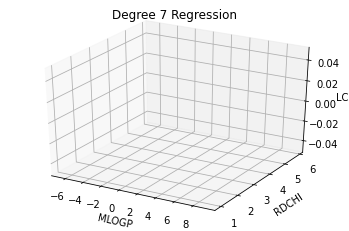

In [25]:
for i in range(0,5000):
  #print(calc_loss_seven(X_train))
  grad_desc_seven(X_train)

print(calc_loss_seven(X_test))
print(w1, w2, w3, w4, w5, w6, b)

def fun(x, y):
    return w1*(x**7) + w2*(x**6)*y + w3*(x**5)*(y**2) + w4*(x**4)*(y**3) + w5*(x**3)*(y**4) + w6*(y**5)*(x**2) + w7*(y**6)*x + w8*(y**7) + b

x = X_train[:,0]
y = X_train[:,1]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)
zs = np.array(fun(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

ax.set_xlabel('MLOGP')
ax.set_ylabel('RDCHI')
ax.set_zlabel('LC50')
ax.set_title('Degree 7 Regression')

plt.show()

Polynomial of Degree 8

In [26]:
w1 = np.random.randn()
w2 = np.random.randn()
w3 = np.random.randn()
w4 = np.random.randn()
w5 = np.random.randn()
w6 = np.random.randn()
w7 = np.random.randn()
w8 = np.random.randn()
w9 = np.random.randn()
b = np.random.randn()

def calc_loss_eight(X):
  cnt = 0
  avg_loss = 0
  for i in X:
    pred = w1*(i[0])**8 + w2*(i[0]**7)*i[1] + w3*(i[0]**6)*(i[1]**2) + w4*(i[0]**5)*(i[1]**3) + w5*(i[0]**4)*(i[1]**4) + w6*(i[0]**3)*(i[1]**5) + w7*(i[1]**6)*(i[0]**2) + w8*(i[1]**7)*i[0] + w9*i[1]**8 + b
    loss_iter = (pred - y_train[cnt])**2 #mse loss
    avg_loss+=loss_iter
    cnt+=1
  avg_loss = avg_loss / X.shape[0]
  return avg_loss

print(calc_loss_five(X_train))
print(calc_loss_five(X_test))

16975918.604618054
4728395.735908599


In [27]:
def grad_desc_eight(X):
  cnt = 0
  global w1, w2, w3, w4, w5, w6
  global b
  w1_grad = 0
  w2_grad = 0
  w3_grad = 0
  w4_grad = 0
  w5_grad = 0
  w6_grad = 0
  b_grad = 0

  for i in X:
    pred = w1 * (i[0])**5 + w2*(i[0]**4)*i[1] + w3*(i[0]**3)*(i[1]**2) + w4*(i[0]**2)*(i[1]**3) + w5*i[0]*(i[1]**4) + w6*i[1]**5 + b
    w1_grad += (2/X.shape[0])*(pred - y_train[cnt])*(i[0])**5
    w2_grad += (2/X.shape[0])*(pred - y_train[cnt])*(i[0]**4)*i[1]
    w3_grad += (2/X.shape[0])*(pred - y_train[cnt])*(i[0]**3)*(i[1]**2)
    w4_grad += (2/X.shape[0])*(pred - y_train[cnt])*(i[0]**2)*(i[1]**3)
    w5_grad += (2/X.shape[0])*(pred - y_train[cnt])*(i[1]**4)*i[0]
    w6_grad += (2/X.shape[0])*(pred - y_train[cnt])*i[1]**5
    b_grad += (2/X.shape[0])*(pred - y_train[cnt])
    cnt+=1
  w1 = w1 - 1e-8 * w1_grad ##higher lr causes overshoot
  w2 = w2 - 1e-8 * w2_grad
  w3 = w3 - 1e-8 * w3_grad
  w4 = w4 - 1e-8 * w4_grad
  w5 = w5 - 1e-8 * w5_grad
  w6 = w6 - 1e-8 * w6_grad
  b = b - 1e-8 * b_grad

1819.5894655521083
-0.24858061634398282 0.5098636981693019 0.3592744646406634 -0.9714785429092185 0.20260389679404678 0.030693888070582976 -0.7436378451941881


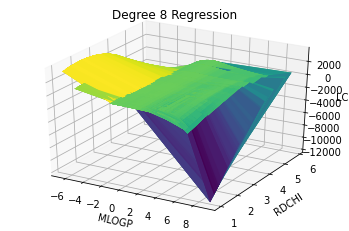

In [28]:
for i in range(0,5000):
  #print(calc_loss_five(X_train))
  grad_desc_five(X_train)

print(calc_loss_five(X_test))
print(w1, w2, w3, w4, w5, w6, b)

def fun(x, y):
    return w1*(x)**5 + w2*y*x**4 + w3*(x**3)*y**2 + w4*(x**2)*(y**3) + w5*x*(y**4) + w6*(y)**5 + b

x = X_train[:,0]
y = X_train[:,1]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)
zs = np.array(fun(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

ax.set_xlabel('MLOGP')
ax.set_ylabel('RDCHI')
ax.set_zlabel('LC50')
ax.set_title('Degree 8 Regression')

plt.show()

Polynomial of Degree 9

In [29]:
w1 = np.random.randn()
w2 = np.random.randn()
w3 = np.random.randn()
w4 = np.random.randn()
w5 = np.random.randn()
w6 = np.random.randn()
w7 = np.random.randn()
w8 = np.random.randn()
w9 = np.random.randn()
w10 = np.random.randn()
b = np.random.randn()

def calc_loss_nine(X):
  cnt = 0
  avg_loss = 0
  for i in X:
    pred = w1*(i[0])**9 + w2*(i[0]**8)*i[1] + w3*(i[0]**7)*(i[1]**2) + w4*(i[0]**6)*(i[1]**3) + w5*(i[0]**5)*(i[1]**4) + w6*(i[1]**4)*(i[0]**5) + w7*(i[0]**3)*(i[1]**6) + w8*(i[0]**2)*(i[1]**7) + w9*i[0]*(i[1]**8) + w10*(i[1]**9) + b
    loss_iter = (pred - y_train[cnt])**2 #mse loss
    avg_loss+=loss_iter
    cnt+=1
  avg_loss = avg_loss / X.shape[0]
  return avg_loss

print(calc_loss_nine(X_train))
print(calc_loss_nine(X_test))

544478364834844.1
10032817984332.668


In [30]:
def grad_desc_nine(X):
  cnt = 0
  global w1, w2, w3, w4, w5, w6
  global b
  w1_grad = 0
  w2_grad = 0
  w3_grad = 0
  w4_grad = 0
  w5_grad = 0
  w6_grad = 0
  b_grad = 0

  for i in X:
    pred = w1 * (i[0])**5 + w2*(i[0]**4)*i[1] + w3*(i[0]**3)*(i[1]**2) + w4*(i[0]**2)*(i[1]**3) + w5*i[0]*(i[1]**4) + w6*i[1]**5 + b
    w1_grad += (2/X.shape[0])*(pred - y_train[cnt])*(i[0])**5
    w2_grad += (2/X.shape[0])*(pred - y_train[cnt])*(i[0]**4)*i[1]
    w3_grad += (2/X.shape[0])*(pred - y_train[cnt])*(i[0]**3)*(i[1]**2)
    w4_grad += (2/X.shape[0])*(pred - y_train[cnt])*(i[0]**2)*(i[1]**3)
    w5_grad += (2/X.shape[0])*(pred - y_train[cnt])*(i[1]**4)*i[0]
    w6_grad += (2/X.shape[0])*(pred - y_train[cnt])*i[1]**5
    b_grad += (2/X.shape[0])*(pred - y_train[cnt])
    cnt+=1
  w1 = w1 - 1e-8 * w1_grad ##higher lr causes overshoot
  w2 = w2 - 1e-8 * w2_grad
  w3 = w3 - 1e-8 * w3_grad
  w4 = w4 - 1e-8 * w4_grad
  w5 = w5 - 1e-8 * w5_grad
  w6 = w6 - 1e-8 * w6_grad
  b = b - 1e-8 * b_grad

3495.172566287905
-0.13831246847954304 0.22881713897839473 0.2954052913994784 -0.45399291577228623 -0.056605810891321856 0.048650434041414996 -0.33713106137757143


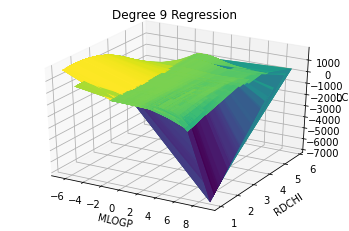

In [31]:
for i in range(0,5000):
  #print(calc_loss_five(X_train))
  grad_desc_five(X_train)

print(calc_loss_five(X_test))
print(w1, w2, w3, w4, w5, w6, b)

def fun(x, y):
    return w1*(x)**5 + w2*y*x**4 + w3*(x**3)*y**2 + w4*(x**2)*(y**3) + w5*x*(y**4) + w6*(y)**5 + b

x = X_train[:,0]
y = X_train[:,1]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)
zs = np.array(fun(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

ax.set_xlabel('MLOGP')
ax.set_ylabel('RDCHI')
ax.set_zlabel('LC50')
ax.set_title('Degree 9 Regression')

plt.show()

# Regularization

q=2

1.8602693453216232
4.3687738970259336


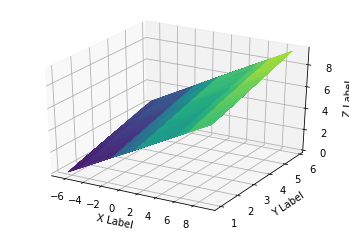

In [32]:
w1 =  0.44496916525402597
w2 =  0.500917482154381
b =  2.3583851326043512
lamb = 1e-18

#Loss function for w1*x1 + w2 * x2 + b (degree 1)
def calc_loss_l2(X):
  cnt = 0
  sum_loss = 0
  for i in X:
    pred = w1 * i[0] + w2 * i[1] + b
    loss_iter = (pred - y_train[cnt])**2 #mse loss
    sum_loss+=loss_iter
    cnt+=1
  loss = 0.5 * sum_loss + ((lamb)/2)*(w1**2+w2**2)
  return loss

print(calc_loss_linear(X_train))
print(calc_loss_linear(X_test))

def calc_grad_l2(X):
  cnt = 0
  global w1
  global w2
  global b
  w1_grad = 0
  w2_grad = 0
  b_grad = 0
  nonregsum1 = 0
  nonregsum2 = 0
  nonregsum3 = 0 
  for i in X:
    nonregsum1 += (w1 * i[0] + w2 * i[1] + b - y_train[cnt]) * i[0] / X.shape[0]
    nonregsum2 += (w1 * i[0] + w2 * i[1] + b - y_train[cnt]) * i[1]
    nonregsum3 += (w1 * i[0] + w2 * i[1] + b - y_train[cnt])
    cnt+=1
  w1_grad = nonregsum1 + (lamb)*w1
  w2_grad = nonregsum2 + (lamb)*w2
  b_grad = nonregsum3
  w1 = w1 - 1e-5*w1_grad
  w2 = w2 - 1e-5*w2_grad
  b = b - 1e-5*b_grad

  for i in range(0,10000):
   print(calc_loss_linear(X_train))
   calc_grad_l2(X_train)

#print(calc_loss_linear(X_train))
#print(calc_loss_linear(X_test))

def fun(x, y):
    return w1*x+w2*y+b

x = X_train[:,0]
y = X_train[:,1]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)
zs = np.array(fun(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)

 
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

q=4

1.8602693453216232
4.3687738970259336


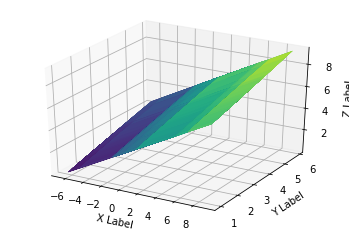

In [33]:
w1 =  0.44496916525402597
w2 =  0.500917482154381
b =  2.3583851326043512

#Loss function for w1*x1 + w2 * x2 + b (degree 1)
def calc_loss_l2(X):
  cnt = 0
  sum_loss = 0
  for i in X:
    pred = w1 * i[0] + w2 * i[1] + b
    loss_iter = (pred - y_train[cnt])**2 #mse loss
    sum_loss+=loss_iter
    cnt+=1
  loss = 0.5 * sum_loss + ((lamb)/2)*(w1**4+w2**4)
  return loss

print(calc_loss_linear(X_train))
print(calc_loss_linear(X_test))

def calc_grad_l2(X):
  cnt = 0
  global w1
  global w2
  global b
  w1_grad = 0
  w2_grad = 0
  b_grad = 0
  nonregsum1 = 0
  nonregsum2 = 0
  nonregsum3 = 0 
  for i in X:
    nonregsum1 += (w1 * i[0] + w2 * i[1] + b - y_train[cnt]) * i[0] / X.shape[0]
    nonregsum2 += (w1 * i[0] + w2 * i[1] + b - y_train[cnt]) * i[1]
    nonregsum3 += (w1 * i[0] + w2 * i[1] + b - y_train[cnt])
    cnt+=1
  w1_grad = nonregsum1 + (lamb)*4*(w1**3)
  w2_grad = nonregsum2 + (lamb)*4*(w2**3)
  b_grad = nonregsum3
  w1 = w1 - 1e-5*w1_grad
  w2 = w2 - 1e-5*w2_grad
  b = b - 1e-5*b_grad

for i in range(0,10000):
  #print(calc_loss_linear(X_train))
  calc_grad_l2(X_train)
#print(calc_loss_linear(X_train))
#print(calc_loss_linear(X_test))

def fun(x, y):
    return w1*x+w2*y+b

x = X_train[:,0]
y = X_train[:,1]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)
zs = np.array(fun(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)

 
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

q = 0.5

1.8602693453216232
4.3687738970259336


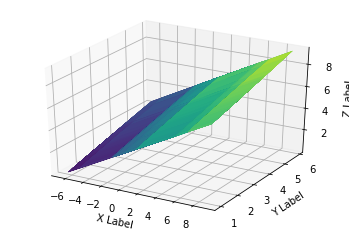

In [34]:
w1 =  0.44496916525402597
w2 =  0.500917482154381
b =  2.3583851326043512

def calc_loss_l2(X):
  cnt = 0
  sum_loss = 0
  for i in X:
    pred = w1 * i[0] + w2 * i[1] + b
    loss_iter = (pred - y_train[cnt])**2 #mse loss
    sum_loss+=loss_iter
    cnt+=1
  loss = 0.5 * sum_loss + ((lamb)/2)*(w1**0.5+w2**0.5)
  print(loss)
  return loss

print(calc_loss_linear(X_train))
print(calc_loss_linear(X_test))

def calc_grad_l2(X):
  cnt = 0
  global w1
  global w2
  global b
  w1_grad = 0
  w2_grad = 0
  b_grad = 0
  nonregsum1 = 0
  nonregsum2 = 0
  nonregsum3 = 0 
  for i in X:
    nonregsum1 += (w1 * i[0] + w2 * i[1] + b - y_train[cnt]) * i[0] / X.shape[0]
    nonregsum2 += (w1 * i[0] + w2 * i[1] + b - y_train[cnt]) * i[1]
    nonregsum3 += (w1 * i[0] + w2 * i[1] + b - y_train[cnt])
    cnt+=1
  w1_grad = nonregsum1 + (lamb)*0.5*(w1**-0.5)
  w2_grad = nonregsum2 + (lamb)*0.5*(w2**-0.5)
  b_grad = nonregsum3
  w1 = w1 - 1e-5*w1_grad
  w2 = w2 - 1e-5*w2_grad
  b = b - 1e-5*b_grad

for i in range(0,10000):
  #print(calc_loss_linear(X_train))
  calc_grad_l2(X_train)

def fun(x, y):
    return w1*x+w2*y+b

x = X_train[:,0]
y = X_train[:,1]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)
zs = np.array(fun(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)

 
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

q = 1

1.8602693453216232
4.3687738970259336


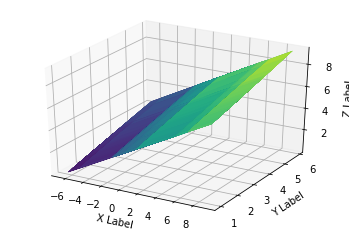

In [35]:
w1 =  0.44496916525402597
w2 =  0.500917482154381
b =  2.3583851326043512

#Loss function for w1*x1 + w2 * x2 + b (degree 1)
def calc_loss_l2(X):
  cnt = 0
  sum_loss = 0
  for i in X:
    pred = w1 * i[0] + w2 * i[1] + b
    loss_iter = (pred - y_train[cnt])**2 #mse loss
    sum_loss+=loss_iter
    cnt+=1
  loss = 0.5 * sum_loss + ((lamb)/2)*(w1+w2)
  return loss

print(calc_loss_linear(X_train))
print(calc_loss_linear(X_test))

def calc_grad_l2(X):
  cnt = 0
  global w1
  global w2
  global b
  w1_grad = 0
  w2_grad = 0
  b_grad = 0
  nonregsum1 = 0
  nonregsum2 = 0
  nonregsum3 = 0 
  for i in X:
    nonregsum1 += (w1 * i[0] + w2 * i[1] + b - y_train[cnt]) * i[0] / X.shape[0]
    nonregsum2 += (w1 * i[0] + w2 * i[1] + b - y_train[cnt]) * i[1]
    nonregsum3 += (w1 * i[0] + w2 * i[1] + b - y_train[cnt])
    cnt+=1
  w1_grad = nonregsum1 + (lamb)/2
  w2_grad = nonregsum2 + (lamb)/2
  b_grad = nonregsum3
  w1 = w1 - 1e-5*w1_grad
  w2 = w2 - 1e-5*w2_grad
  b = b - 1e-5*b_grad
for i in range(0,10000):
  #print(calc_loss_linear(X_train))
  calc_grad_l2(X_train)

def fun(x, y):
    return w1*x+w2*y+b

x = X_train[:,0]
y = X_train[:,1]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)
zs = np.array(fun(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)

 
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

# New section

1.8602693453216232
4.3687738970259336


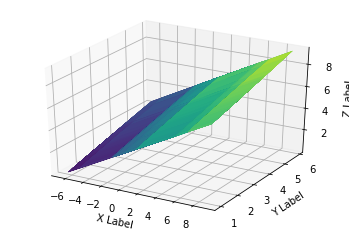

In [36]:
w1 =  0.44496916525402597
w2 =  0.500917482154381
b =  2.3583851326043512

#Loss function for w1*x1 + w2 * x2 + b (degree 1)
def calc_loss_l2(X):
  cnt = 0
  sum_loss = 0
  for i in X:
    pred = w1 * i[0] + w2 * i[1] + b
    loss_iter = (pred - y_train[cnt])**2 #mse loss
    sum_loss+=loss_iter
    cnt+=1
  loss = 0.5 * sum_loss + ((lamb)/2)*(w1+w2)
  return loss

print(calc_loss_linear(X_train))
print(calc_loss_linear(X_test))

def calc_grad_l2(X):
  cnt = 0
  global w1
  global w2
  global b
  w1_grad = 0
  w2_grad = 0
  b_grad = 0
  nonregsum1 = 0
  nonregsum2 = 0
  nonregsum3 = 0 
  for i in X:
    nonregsum1 += (w1 * i[0] + w2 * i[1] + b - y_train[cnt]) * i[0] / X.shape[0]
    nonregsum2 += (w1 * i[0] + w2 * i[1] + b - y_train[cnt]) * i[1]
    nonregsum3 += (w1 * i[0] + w2 * i[1] + b - y_train[cnt])
    cnt+=1
  w1_grad = nonregsum1 + (lamb)/2
  w2_grad = nonregsum2 + (lamb)/2
  b_grad = nonregsum3
  w1 = w1 - 1e-5*w1_grad
  w2 = w2 - 1e-5*w2_grad
  b = b - 1e-5*b_grad
for i in range(0,10000):
  #print(calc_loss_linear(X_train))
  calc_grad_l2(X_train)

def fun(x, y):
    return w1*x+w2*y+b

x = X_train[:,0]
y = X_train[:,1]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)
zs = np.array(fun(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)

 
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()